In [204]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as fd

In [205]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [206]:
file_name

'D:/OneDrive - Ingenio Azucarero Guabira S.A/UTEA_2023/TRABAJOS/2023-02-02_PLANOS PARA MARIANO AGUILERA PARA APP/_MODEL/SHP_RUDI/216.shp'

In [207]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

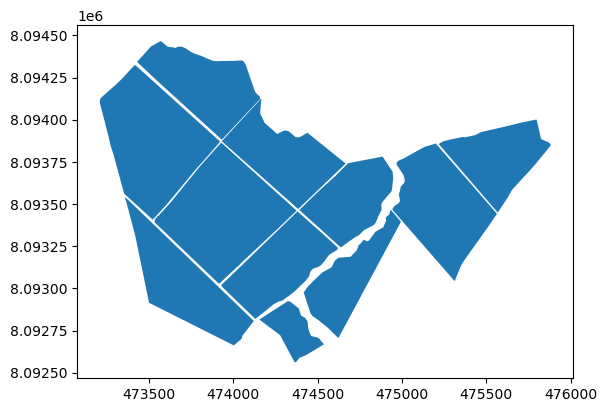

In [208]:
data.plot()
plt.show()

In [209]:
data.head(3)

,LOTES,SUPERFICIE,CODCA,COD_PROP,COD,COD_1,COD_PROP_1,PROPIEDAD,COD_CAÑE,CAÑERO,...,Area_____H,Variedad,Fecha_Siem,Textura,FINANCIAMI,GESTION,CORTE,INSTITUCIO,OBSERVACIO,geometry
0,L3.2,21.387501,75,216.0,00002160000L3.2,00002160000L3.2,216,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,...,0.0,RB-2,2017-04-15,FA,None,2017,5,50,canha,"POLYGON Z ((473644.123 8094428.721 0.000, 4736..."
1,L4.1,35.541082,75,216.0,00002160000L4.1.2,00002160000L4.1.2,216,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,...,0.0,UCG 90-20,2016-04-15,FA,None,2016,6,50,canha,"POLYGON Z ((474374.681 8093460.708 0.000, 4742..."
2,L3.1,20.260332,75,216.0,00002160000L3.1,00002160000L3.1,216,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,...,0.0,RB-2,2016-04-15,FY,None,2016,6,50,canha,"POLYGON Z ((474184.416 8093981.776 0.000, 4742..."


In [210]:
# LISTA DE COLUMNAS DEL SHP
columnas_prop = list(data.columns)
columnas_prop

['LOTES',
 'SUPERFICIE',
 'CODCA',
 'COD_PROP',
 'COD',
 'COD_1',
 'COD_PROP_1',
 'PROPIEDAD',
 'COD_CAÑE',
 'CAÑERO',
 'Lote',
 'Area_____H',
 'Variedad',
 'Fecha_Siem',
 'Textura',
 'FINANCIAMI',
 'GESTION',
 'CORTE',
 'INSTITUCIO',
 'OBSERVACIO',
 'geometry']

In [211]:
columnas_esperadas = ['id', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 
                      'variedad', 'fs', 'textura', 'soca', 'area', 'geometry']
columnas_esperadas

['id',
 'unidad_01',
 'unidad_02',
 'unidad_03',
 'unidad_04',
 'unidad_05',
 'variedad',
 'fs',
 'textura',
 'soca',
 'area',
 'geometry']

In [212]:
columnas_faltantes = []
for col in columnas_esperadas:
    if col not in columnas_prop:
        columnas_faltantes.append(col)
print(columnas_faltantes)

['id', 'unidad_01', 'unidad_02', 'unidad_03', 'unidad_04', 'unidad_05', 'variedad', 'fs', 'textura', 'soca', 'area']


In [213]:
dic_cambio_nombre = {
    'COD':'id',
    'COD_PROP':'unidad_01',
    'PROPIEDAD':'unidad_02',
    'CODCA':'unidad_03',
    'CAÑERO':'unidad_04',
    'LOTES':'unidad_05',
    'Variedad':'variedad',
    'Fecha_Siem':'fs',
    'Textura':'textura',
    'CORTE':'soca',
    'SUPERFICIE':'area'
}
dic_cambio_nombre

{'COD': 'id',
 'COD_PROP': 'unidad_01',
 'PROPIEDAD': 'unidad_02',
 'CODCA': 'unidad_03',
 'CAÑERO': 'unidad_04',
 'LOTES': 'unidad_05',
 'Variedad': 'variedad',
 'Fecha_Siem': 'fs',
 'Textura': 'textura',
 'CORTE': 'soca',
 'SUPERFICIE': 'area'}

In [214]:
data = data.rename(columns = dic_cambio_nombre)
data.head(3)

,unidad_05,area,unidad_03,unidad_01,id,COD_1,COD_PROP_1,unidad_02,COD_CAÑE,unidad_04,...,Area_____H,variedad,fs,textura,FINANCIAMI,GESTION,soca,INSTITUCIO,OBSERVACIO,geometry
0,L3.2,21.387501,75,216.0,00002160000L3.2,00002160000L3.2,216,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,...,0.0,RB-2,2017-04-15,FA,None,2017,5,50,canha,"POLYGON Z ((473644.123 8094428.721 0.000, 4736..."
1,L4.1,35.541082,75,216.0,00002160000L4.1.2,00002160000L4.1.2,216,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,...,0.0,UCG 90-20,2016-04-15,FA,None,2016,6,50,canha,"POLYGON Z ((474374.681 8093460.708 0.000, 4742..."
2,L3.1,20.260332,75,216.0,00002160000L3.1,00002160000L3.1,216,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,...,0.0,RB-2,2016-04-15,FY,None,2016,6,50,canha,"POLYGON Z ((474184.416 8093981.776 0.000, 4742..."


In [215]:
columnas_data = data.columns
columnas_data

Index(['unidad_05', 'area', 'unidad_03', 'unidad_01', 'id', 'COD_1',
       'COD_PROP_1', 'unidad_02', 'COD_CAÑE', 'unidad_04', 'Lote',
       'Area_____H', 'variedad', 'fs', 'textura', 'FINANCIAMI', 'GESTION',
       'soca', 'INSTITUCIO', 'OBSERVACIO', 'geometry'],
      dtype='object')

In [216]:
columnas_de_mas = []
for col in columnas_data:
    if col not in columnas_esperadas:
        columnas_de_mas.append(col)
print(columnas_de_mas)

['COD_1', 'COD_PROP_1', 'COD_CAÑE', 'Lote', 'Area_____H', 'FINANCIAMI', 'GESTION', 'INSTITUCIO', 'OBSERVACIO']


In [217]:
data = data.drop(columnas_de_mas, axis=1)
data.head(3)

,unidad_05,area,unidad_03,unidad_01,id,unidad_02,unidad_04,variedad,fs,textura,soca,geometry
0,L3.2,21.387501,75,216.0,00002160000L3.2,LA ESTACADA--AGUILERA,AGUILERA TARADELLES NELSON MARIANO,RB-2,2017-04-15,FA,5,"POLYGON Z ((473644.123 8094428.721 0.000, 4736..."
1,L4.1,35.541082,75,216.0,00002160000L4.1.2,LA ESTACADA--AGUILERA,AGUILERA TARADELLES NELSON MARIANO,UCG 90-20,2016-04-15,FA,6,"POLYGON Z ((474374.681 8093460.708 0.000, 4742..."
2,L3.1,20.260332,75,216.0,00002160000L3.1,LA ESTACADA--AGUILERA,AGUILERA TARADELLES NELSON MARIANO,RB-2,2016-04-15,FY,6,"POLYGON Z ((474184.416 8093981.776 0.000, 4742..."


In [218]:
data = data[columnas_esperadas]
data.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,soca,area,geometry
0,00002160000L3.2,216.0,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L3.2,RB-2,2017-04-15,FA,5,21.387501,"POLYGON Z ((473644.123 8094428.721 0.000, 4736..."
1,00002160000L4.1.2,216.0,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L4.1,UCG 90-20,2016-04-15,FA,6,35.541082,"POLYGON Z ((474374.681 8093460.708 0.000, 4742..."
2,00002160000L3.1,216.0,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L3.1,RB-2,2016-04-15,FY,6,20.260332,"POLYGON Z ((474184.416 8093981.776 0.000, 4742..."


In [219]:
data.crs.name

'WGS 84 / UTM zone 20S'

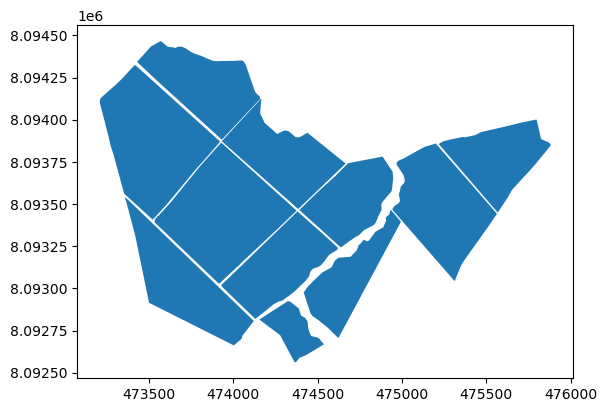

In [220]:
propiedad = data[data['unidad_01']==216]
propiedad.plot()
plt.show()

In [221]:
def quitar_caracteres(text):
    text = text.replace('_', ' ')
    text = text.replace('"', '')
    text = text.replace('.', '')
    return text

In [222]:
propiedad.head(3)

,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,textura,soca,area,geometry
0,00002160000L3.2,216.0,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L3.2,RB-2,2017-04-15,FA,5,21.387501,"POLYGON Z ((473644.123 8094428.721 0.000, 4736..."
1,00002160000L4.1.2,216.0,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L4.1,UCG 90-20,2016-04-15,FA,6,35.541082,"POLYGON Z ((474374.681 8093460.708 0.000, 4742..."
2,00002160000L3.1,216.0,LA ESTACADA--AGUILERA,75,AGUILERA TARADELLES NELSON MARIANO,L3.1,RB-2,2016-04-15,FY,6,20.260332,"POLYGON Z ((474184.416 8093981.776 0.000, 4742..."


In [223]:
propiedad.dtypes

id             object
unidad_01     float64
unidad_02      object
unidad_03      object
unidad_04      object
unidad_05      object
variedad       object
fs             object
textura        object
soca            int64
area          float64
geometry     geometry
dtype: object

In [224]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'id':'string',
    'unidad_01':'int',
    'unidad_02':'string',
    'unidad_03':'int',
    'unidad_04':'string',
    'unidad_05':'string',
    'variedad':'string',
    'fs':'string',
    'textura':'string',
    'soca':'int',
    'area':'float'
})

In [225]:
# EXTRAER NOMBRE DE LA PROPIEDAD
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']
file_name

'216_LA ESTACADA--AGUILERA'

In [226]:
columnas_dima = {
    'id':'ID',
    'unidad_01':'COD_PROP',
    'unidad_03':'COD_CA',
    'unidad_05':'NOM_LOTE',
    'variedad':'VARIEDAD',
    'fs':'FECHA_SIEM',
    'textura':'TEXTURA',
    'soca':'CORTE',
    'area':'SUPERFICIE'
}

In [227]:
# RENOMBRA LAS COLUMNAS AL FORMATO DE DIMA
propiedad = propiedad.rename(columns=columnas_dima)
# ELIMINA LAS COLUMNAS DE NOMBRES DE PROPIEDAD Y CAÑERO
propiedad = propiedad.drop(['unidad_02', 'unidad_04'], axis=1)
propiedad.head(3)

,ID,COD_PROP,COD_CA,NOM_LOTE,VARIEDAD,FECHA_SIEM,TEXTURA,CORTE,SUPERFICIE,geometry
0,00002160000L3.2,216,75,L3.2,RB-2,2017-04-15,FA,5,21.387501,"POLYGON Z ((473644.123 8094428.721 0.000, 4736..."
1,00002160000L4.1.2,216,75,L4.1,UCG 90-20,2016-04-15,FA,6,35.541082,"POLYGON Z ((474374.681 8093460.708 0.000, 4742..."
2,00002160000L3.1,216,75,L3.1,RB-2,2016-04-15,FY,6,20.260332,"POLYGON Z ((474184.416 8093981.776 0.000, 4742..."


In [228]:
# RECARCULAR EL ID
propiedad['ID'] = propiedad.apply(lambda x : '0000' + str(x['COD_PROP']) + '0000' + x['NOM_LOTE'], axis=1)
propiedad.head(3)

,ID,COD_PROP,COD_CA,NOM_LOTE,VARIEDAD,FECHA_SIEM,TEXTURA,CORTE,SUPERFICIE,geometry
0,00002160000L3.2,216,75,L3.2,RB-2,2017-04-15,FA,5,21.387501,"POLYGON Z ((473644.123 8094428.721 0.000, 4736..."
1,00002160000L4.1,216,75,L4.1,UCG 90-20,2016-04-15,FA,6,35.541082,"POLYGON Z ((474374.681 8093460.708 0.000, 4742..."
2,00002160000L3.1,216,75,L3.1,RB-2,2016-04-15,FY,6,20.260332,"POLYGON Z ((474184.416 8093981.776 0.000, 4742..."


In [229]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        else:
            return 'SOCA'
    except Exception as ex:
        return 'RENOVACION'

In [230]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [231]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)
propiedad.head()

,ID,COD_PROP,COD_CA,NOM_LOTE,VARIEDAD,FECHA_SIEM,TEXTURA,CORTE,SUPERFICIE,geometry,ESTADO
0,00002160000L3.2,216,75,L3.2,RB-2,20170415,FA,5,21.387501,"POLYGON Z ((473644.123 8094428.721 0.000, 4736...",SOCA
1,00002160000L4.1,216,75,L4.1,UCG 90-20,20160415,FA,6,35.541082,"POLYGON Z ((474374.681 8093460.708 0.000, 4742...",SOCA
2,00002160000L3.1,216,75,L3.1,RB-2,20160415,FY,6,20.260332,"POLYGON Z ((474184.416 8093981.776 0.000, 4742...",SOCA
3,00002160000L7.2,216,75,L7.2,CITTCA 85-22,20090410,FA,13,18.127627,"POLYGON Z ((475567.457 8093449.203 0.000, 4752...",SOCA
4,00002160000L2,216,75,L2,UCG 90-20,20150412,FY,7,17.102396,"POLYGON Z ((474682.230 8093275.546 0.000, 4746...",SOCA


In [232]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [233]:
tchs = pd.read_excel(fp_tch)

In [234]:
tchs.head(3)

,COD_AVANCE,CODIGO CAÑERO,INS,NOMBRE CAÑERO,DESSIG,CREA,COMPROMISO GRUPAL,COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,...,TN ENTREGADAS INDIVIDUAL,% ENTREGA GRUPAL,HA COSECHA GRUPAL,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2022,RENDIMIENTO 2021,ESTIMATIVA RENDIMIENTO 2022,OBSERVACIONES,Unnamed: 20
0,131_1,2224,NaN,CRUZ VARGAS WILLY WALDO,NaN,NaN,7067.07,0.00,NaN,NaN,...,42.86,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,81_36,41555,81.0,FRANCO GUZMAN CARLA DANIELA,NaN,NaN,7053.98,7053.98,0.0,0.0,...,7138.06,1.011920,0.0,0.0,NaN,NaN,0.000000,59.896088,SIN CATASTRO,NaN
2,50_29,15501,50.0,WENDE RIOJA MAURICIO,NaN,NaN,4525.38,4525.38,0.0,0.0,...,3537.96,0.781804,0.0,0.0,NaN,NaN,39.153575,0.000000,SIN CATASTRO,NaN


In [235]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO'] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [236]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

,ID,COD_PROP,COD_CA,NOM_LOTE,VARIEDAD,FECHA_SIEM,TEXTURA,CORTE,SUPERFICIE,geometry,ESTADO,RENDIMIENT
0,00002160000L3.2,216,75,L3.2,RB-2,20170415,FA,5,21.387501,"POLYGON Z ((473644.123 8094428.721 0.000, 4736...",SOCA,72.361904
1,00002160000L4.1,216,75,L4.1,UCG 90-20,20160415,FA,6,35.541082,"POLYGON Z ((474374.681 8093460.708 0.000, 4742...",SOCA,72.361904
2,00002160000L3.1,216,75,L3.1,RB-2,20160415,FY,6,20.260332,"POLYGON Z ((474184.416 8093981.776 0.000, 4742...",SOCA,72.361904


In [237]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [238]:
bloques = pd.read_excel(fp_bloques)

In [239]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,fk_pixel,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,44038,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN


In [240]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [241]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

,ID,COD_PROP,COD_CA,NOM_LOTE,VARIEDAD,FECHA_SIEM,TEXTURA,CORTE,SUPERFICIE,geometry,ESTADO,RENDIMIENT,CUADRANTE
0,00002160000L3.2,216,75,L3.2,RB-2,20170415,FA,5,21.387501,"POLYGON Z ((473644.123 8094428.721 0.000, 4736...",SOCA,72.361904,359
1,00002160000L4.1,216,75,L4.1,UCG 90-20,20160415,FA,6,35.541082,"POLYGON Z ((474374.681 8093460.708 0.000, 4742...",SOCA,72.361904,359
2,00002160000L3.1,216,75,L3.1,RB-2,20160415,FY,6,20.260332,"POLYGON Z ((474184.416 8093981.776 0.000, 4742...",SOCA,72.361904,359


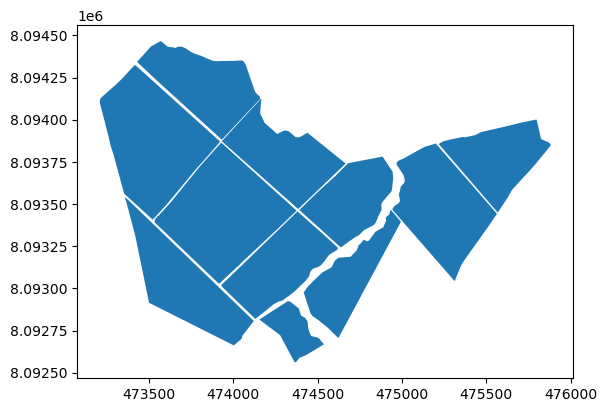

In [242]:
propiedad.plot()
plt.show()

In [243]:
#quitar_caracteres
propiedad['VARIEDAD'] = propiedad['VARIEDAD'].apply(quitar_caracteres)

In [244]:
propiedad['SUPERFICIE'].sum()

239.80637170094

In [245]:
propiedad.head()

,ID,COD_PROP,COD_CA,NOM_LOTE,VARIEDAD,FECHA_SIEM,TEXTURA,CORTE,SUPERFICIE,geometry,ESTADO,RENDIMIENT,CUADRANTE
0,00002160000L3.2,216,75,L3.2,RB-2,20170415,FA,5,21.387501,"POLYGON Z ((473644.123 8094428.721 0.000, 4736...",SOCA,72.361904,359
1,00002160000L4.1,216,75,L4.1,UCG 90-20,20160415,FA,6,35.541082,"POLYGON Z ((474374.681 8093460.708 0.000, 4742...",SOCA,72.361904,359
2,00002160000L3.1,216,75,L3.1,RB-2,20160415,FY,6,20.260332,"POLYGON Z ((474184.416 8093981.776 0.000, 4742...",SOCA,72.361904,359
3,00002160000L7.2,216,75,L7.2,CITTCA 85-22,20090410,FA,13,18.127627,"POLYGON Z ((475567.457 8093449.203 0.000, 4752...",SOCA,72.361904,359
4,00002160000L2,216,75,L2,UCG 90-20,20150412,FY,7,17.102396,"POLYGON Z ((474682.230 8093275.546 0.000, 4746...",SOCA,72.361904,359


In [246]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [247]:
propiedad = propiedad.to_crs(epsg=4326)

In [248]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [249]:
file_name + '.geojson'

'216_LA ESTACADA--AGUILERA.geojson'

In [250]:
#file_name='d'

In [251]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\PROPIEDADES_OFFICIALES")

In [252]:
out_dir = os.path.normpath((os.getcwd() + '/' + file_name + '.geojson' ))

In [253]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\PROPIEDADES_OFFICIALES\\216_LA ESTACADA--AGUILERA.geojson'

In [254]:
propiedad.to_file(out_dir, driver='GeoJSON')